<a href="https://colab.research.google.com/github/sidaye001/CS666_assignments/blob/main/%E2%80%9CCS666_Assignment_1_Sida_Ye_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

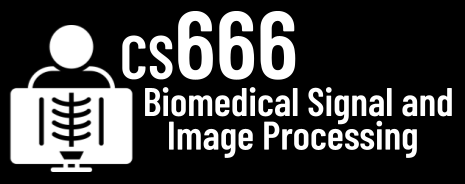

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 1.2 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from biosppy import storage
signal, metadata = storage.load_txt('/content/drive/MyDrive/ColabNotebooks/ecg.txt')

In [ ]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

In [ ]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

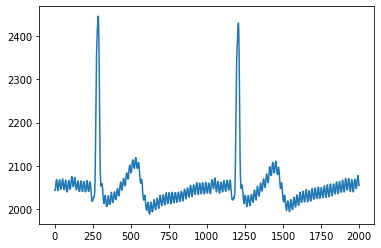

In [ ]:
from matplotlib import pyplot as plt
plt.plot(signal[0:2000])

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
Fs = metadata['sampling_rate']
N = len(signal)
Fs

1000.0

In [ ]:
T = (N - 1) / Fs  # duration
T

14.999

In [ ]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = 15 ### TODO!

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
from biosppy.signals import ecg

In [ ]:
out = ecg.ecg(signal=signal, sampling_rate=1000., show=False)
#Tk will normally create GUI (like a new window) the interface. But Colab is run on the web server in the cloud. It can't open a window on the machine. 

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

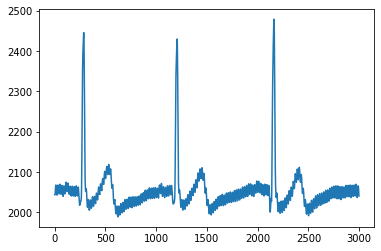

In [ ]:

second_to_query = 0
first3_second_unfiltered = signal[second_to_query*SAMPLING_RATE:(second_to_query+3)*SAMPLING_RATE]
plt.plot(first3_second_unfiltered)

### TODO plot unfiltered signal

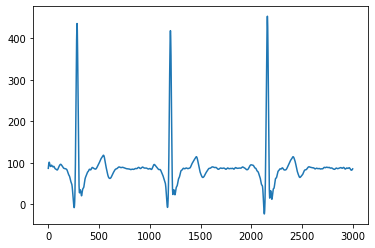

In [ ]:

first3_second_filtered = out[1][second_to_query*SAMPLING_RATE:(second_to_query+3)*SAMPLING_RATE]
plt.plot(first3_second_filtered)
### TODO plot filtered signal

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

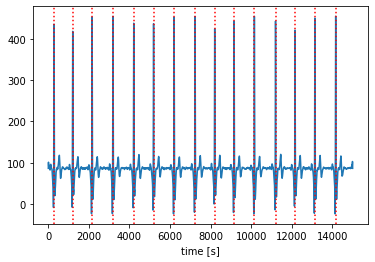

In [94]:
whole_filtered_signal = out[1]
plt.plot(whole_filtered_signal)
plt.xlabel('time [s]')
rpeaks_indices = out[2]
plt.axvline(x = rpeaks_indices[0], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[1], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[2], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[3], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[4], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[5], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[6], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[7], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[8], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[9], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[10], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[11], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[12], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[13], color = 'r', ls=':')
plt.axvline(x = rpeaks_indices[14], color = 'r', ls=':')



### TODO

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [95]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.5 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [96]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
import numpy as np
import pandas as pd


In [98]:
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Delineate the ECG signal
rpeaks=rpeaks_indices
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


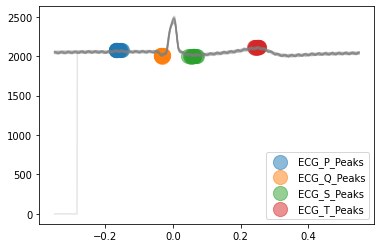

In [100]:
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
# TODO Does the detection work well?
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


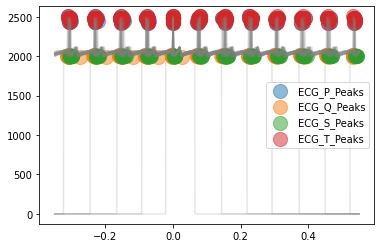

In [139]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=13000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [127]:
rpeaks

array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162])

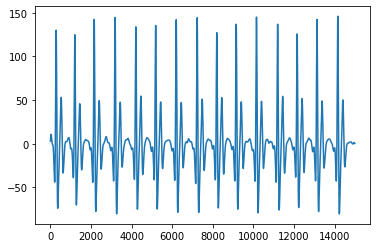

In [103]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
cleaned = nk.signal_filter(signal, 
                               sampling_rate=1000, 
                               lowcut=2, 
                               highcut=9, 
                               method='butterworth')
plt.plot(cleaned)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

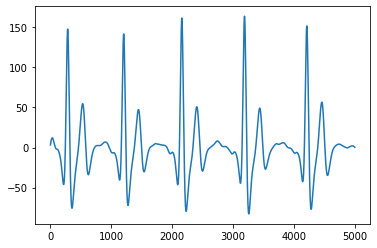

In [123]:
#first 5 seconds after filtering
first5_second_unfiltered = signal[0:(second_to_query+5)*SAMPLING_RATE]
first5_second_cleaned=nk.signal_filter(first5_second_unfiltered, 
                               sampling_rate=1000, 
                               lowcut=2, 
                               highcut=10, 
                               method='butterworth')
plt.plot(first5_second_cleaned)

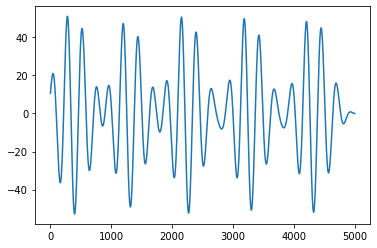

In [124]:
first5_second_cleaned=nk.signal_filter(first5_second_unfiltered, 
                               sampling_rate=1000, 
                               lowcut=3, 
                               highcut=5, 
                               method='butterworth')
plt.plot(first5_second_cleaned)

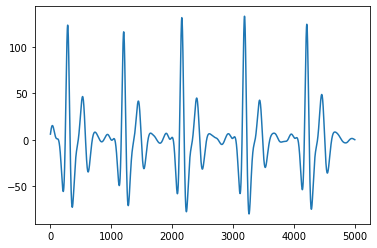

In [125]:
first5_second_cleaned=nk.signal_filter(first5_second_unfiltered, 
                               sampling_rate=1000, 
                               lowcut=3, 
                               highcut=9, 
                               method='butterworth')
plt.plot(first5_second_cleaned)



In [ ]:
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
#lowcut=3, highcut=9 works better
                               

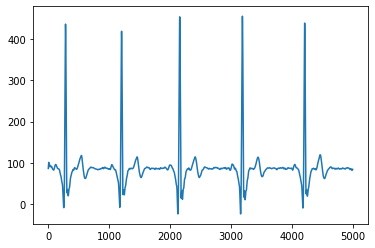

In [135]:
# TODO Which one works the best?
# Finally, run the delineation on the filtered signal from BioSPPY.'
# Finally, run the delineation on the filtered signal from BioSPPY.
# Finally, run the delineation on the filtered signal from BioSPPY.
plt.plot(out[1][0:(second_to_query+5)*SAMPLING_RATE])

In [ ]:
#Actually, I think NeuroKit2 library is better than Biossppy.

# 新段落

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#